# DISNEYLAND

## Plan of action
1. Load **Disneyland Dataset** and import required packages.
2. **Data cleaning and Data visualization**: change to 1 all the reviews with more than 3 rating stars, and set the rest to 0. In addition, I do some data visualization of the different variables.
3. **Operations on text**: this is the step of cleaning the text, where I remove useless words from the dataset.
4. **Frequency words**: here I verify which words are the most frequents into the dataset.
5. **Logistic Regression**: this is a very simple model where, after splitting the datset into training set and test set, we classify the observations among the two classes.
6. **Word2Vec Model**: through this algorithm it's easier to understand the menaing of a word from the context.
7. **Prepare Embedding with Glove**: where we import Glove, to build Embedding Dictionary and to use this to build Embedding Matrix for our Corpus.
8. **LSTM**: a type of RNN widely used in the context of sentiment analysis.

# 1 - Import Packages and load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report
import keras
import seaborn as sns
import re
from bs4 import BeautifulSoup
import string

In [3]:
#loading the dataset
Disneyland = pd.read_csv("DisneylandReviews.csv")
Disneyland.head(6)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong


# 2 - Data cleaning and data visualization

In [4]:
Disneyland["Sentiment"] = Disneyland["Rating"].apply(lambda rating : 1 if rating >= 4 else 0)

In [5]:
Disneyland

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,1


In [6]:
Disneyland.shape

(42656, 7)

In [7]:
Disneyland.describe()

,Review_ID,Rating,Sentiment
count,4.265600e+04,42656.000000,42656.000000
mean,3.188553e+08,4.217695,0.795222
std,1.657092e+08,1.063371,0.403544
min,1.398724e+06,1.000000,0.000000
25%,1.743274e+08,4.000000,1.000000
50%,2.907583e+08,5.000000,1.000000
75%,4.489579e+08,5.000000,1.000000
max,6.708014e+08,5.000000,1.000000


In [8]:
#checking null values
Disneyland.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
Sentiment            0
dtype: int64

In [9]:
#checking null values
Disneyland["Review_Text"].isnull().values.any()

False

In [10]:
Disneyland.nunique()

Review_ID            42636
Rating                   5
Year_Month             112
Reviewer_Location      162
Review_Text          42632
Branch                   3
Sentiment                2
dtype: int64

In [11]:
Disneyland.groupby(["Rating"])["Review_ID"].count()

Rating
1     1499
2     2127
3     5109
4    10775
5    23146
Name: Review_ID, dtype: int64

In [12]:
Disneyland.groupby(["Branch"])["Review_ID"].count()

Branch
Disneyland_California    19406
Disneyland_HongKong       9620
Disneyland_Paris         13630
Name: Review_ID, dtype: int64

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

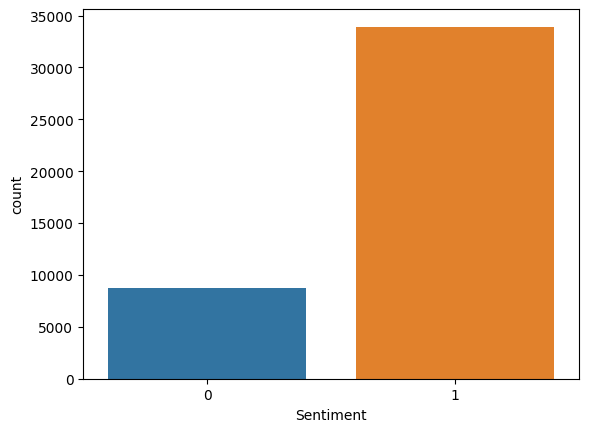

In [13]:
sns.countplot(x = Disneyland["Sentiment"])

[Text(0.5, 1.0, 'Distribution of branch')]

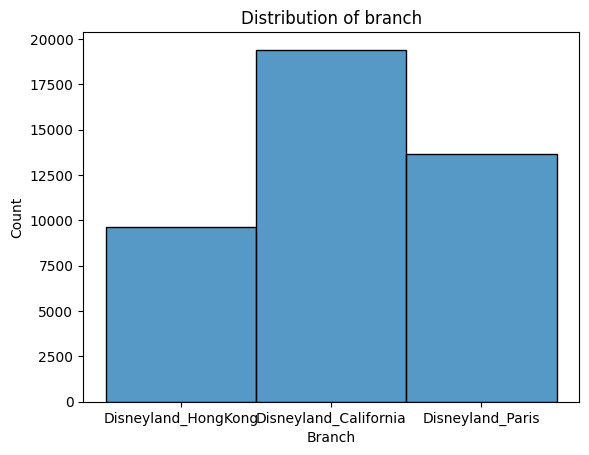

In [14]:
sns.histplot(data = Disneyland, x = Disneyland["Branch"]).set(title = "Distribution of branch")

# 3 - Operations on text

In [15]:
import warnings
warnings.filterwarnings("ignore")

**Removing stopwords**

In [16]:
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Remove stop words
def tokenization(text):

    stop_words = set(stopwords.words('english'))
    tokens = text.lower().split()
    text = ' '.join([word for word in tokens if word not in stop_words])        
    return text

In [18]:
Disneyland["Cleaned_Text"]= Disneyland["Review_Text"].apply(tokenization)

In [19]:
Disneyland["Cleaned_Text"]

0        ever disneyland anywhere find disneyland hong ...
1        since last time visit hk disneyland .. yet, ti...
2        thanks god hot humid visiting park otherwise w...
3        hk disneyland great compact park. unfortunatel...
4        location city, took around 1 hour kowlon, kids...
                               ...                        
42651    went disneyland paris july 03 thought brillian...
42652    2 adults 1 child 11 visited disneyland paris b...
42653    eleven year old daughter went visit son london...
42654    hotel, part disneyland paris complex, wonderfu...
42655    went disneyparis resort, 1996, small child. mi...
Name: Cleaned_Text, Length: 42656, dtype: object

**Punctuation removal**

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
#Remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
Disneyland["Cleaned_Text"]= Disneyland["Cleaned_Text"].apply(remove_punct)

In [22]:
Disneyland["Cleaned_Text"].head(10)

0    ever disneyland anywhere find disneyland hong ...
1    since last time visit hk disneyland  yet time ...
2    thanks god hot humid visiting park otherwise w...
3    hk disneyland great compact park unfortunately...
4    location city took around  hour kowlon kids li...
5    disney world disneyland anaheim tokyo disneyla...
6    great place day go even know it obviously went...
7    think intro disney magic little ones almost at...
8    feel let placethe disneyland train fantastic g...
9    go talking disneyland whatever say it less dis...
Name: Cleaned_Text, dtype: object

**Removing html strips and noise text**

In [23]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text)
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [24]:
Disneyland["Cleaned_Text"]= Disneyland["Cleaned_Text"].apply(denoise_text)

In [25]:
Disneyland["Cleaned_Text"]

0        ever disneyland anywhere find disneyland hong ...
1        since last time visit hk disneyland  yet time ...
2        thanks god hot humid visiting park otherwise w...
3        hk disneyland great compact park unfortunately...
4        location city took around  hour kowlon kids li...
                               ...                        
42651    went disneyland paris july  thought brilliant ...
42652    adults  child  visited disneyland paris beginn...
42653    eleven year old daughter went visit son london...
42654    hotel part disneyland paris complex wonderful ...
42655    went disneyparis resort  small child minute en...
Name: Cleaned_Text, Length: 42656, dtype: object

**Removing numbers and special characters**

In [26]:
def clean_text(text):
# Remove numbers
    text = re.sub(r'\d+', '', text)
    
# Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

In [27]:
Disneyland["Cleaned_Text"] = Disneyland["Cleaned_Text"].apply(clean_text)

In [28]:
Disneyland["Cleaned_Text"]

0        ever disneyland anywhere find disneyland hong ...
1        since last time visit hk disneyland  yet time ...
2        thanks god hot humid visiting park otherwise w...
3        hk disneyland great compact park unfortunately...
4        location city took around  hour kowlon kids li...
                               ...                        
42651    went disneyland paris july  thought brilliant ...
42652    adults  child  visited disneyland paris beginn...
42653    eleven year old daughter went visit son london...
42654    hotel part disneyland paris complex wonderful ...
42655    went disneyparis resort  small child minute en...
Name: Cleaned_Text, Length: 42656, dtype: object

**Text stemmatization**

In [29]:
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    
    return text

In [30]:
Disneyland["Cleaned_Text"]= Disneyland["Cleaned_Text"].apply(stemmer)

In [31]:
Disneyland["Cleaned_Text"]

0        ever disneyland anywher find disneyland hong k...
1        sinc last time visit hk disneyland yet time st...
2        thank god hot humid visit park otherwis would ...
3        hk disneyland great compact park unfortun quit...
4        locat citi took around hour kowlon kid like di...
                               ...                        
42651    went disneyland pari juli thought brilliant vi...
42652    adult child visit disneyland pari begin feb ab...
42653    eleven year old daughter went visit son london...
42654    hotel part disneyland pari complex wonder plac...
42655    went disneypari resort small child minut enter...
Name: Cleaned_Text, Length: 42656, dtype: object

# 4 - Frequency Words

In [32]:
New_Disneyland = Disneyland[["Cleaned_Text","Sentiment"]]
New_Disneyland

,Cleaned_Text,Sentiment
0,ever disneyland anywher find disneyland hong k...,1
1,sinc last time visit hk disneyland yet time st...,1
2,thank god hot humid visit park otherwis would ...,1
3,hk disneyland great compact park unfortun quit...,1
4,locat citi took around hour kowlon kid like di...,1
...,...,...
42651,went disneyland pari juli thought brilliant vi...,1
42652,adult child visit disneyland pari begin feb ab...,1
42653,eleven year old daughter went visit son london...,1
42654,hotel part disneyland pari complex wonder plac...,1


In [33]:
# Frequency Words
from collections import Counter
words = Counter(' '.join(New_Disneyland['Cleaned_Text'].to_list()).split())
Frequency_words = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words = Frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words['Rank'] = Frequency_words['Rank'].apply(lambda x : x+1)
Frequency_words.head(20)

,Rank,Words,Frequency
0,1,park,55678
1,2,ride,52405
2,3,time,38407
3,4,day,36951
4,5,disney,36723
5,6,disneyland,33097
6,7,get,26993
7,8,go,26942
8,9,one,21566
9,10,visit,19763


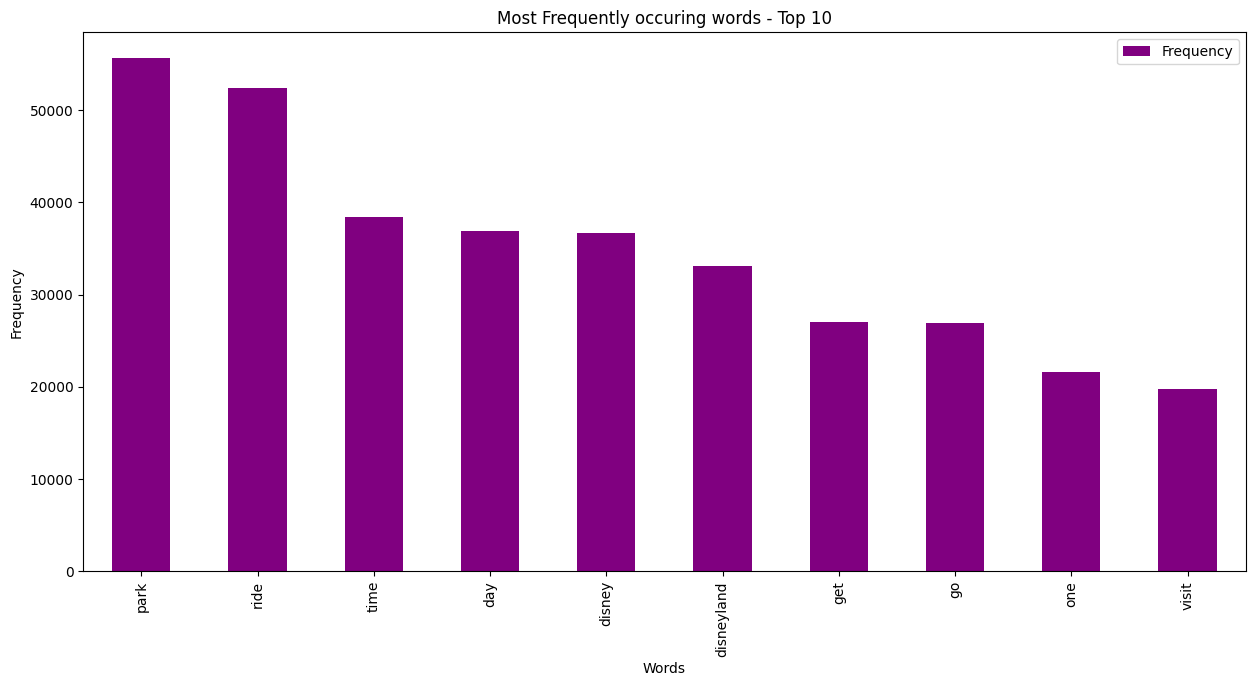

In [34]:
Top10 = Frequency_words[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words - Top 10")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

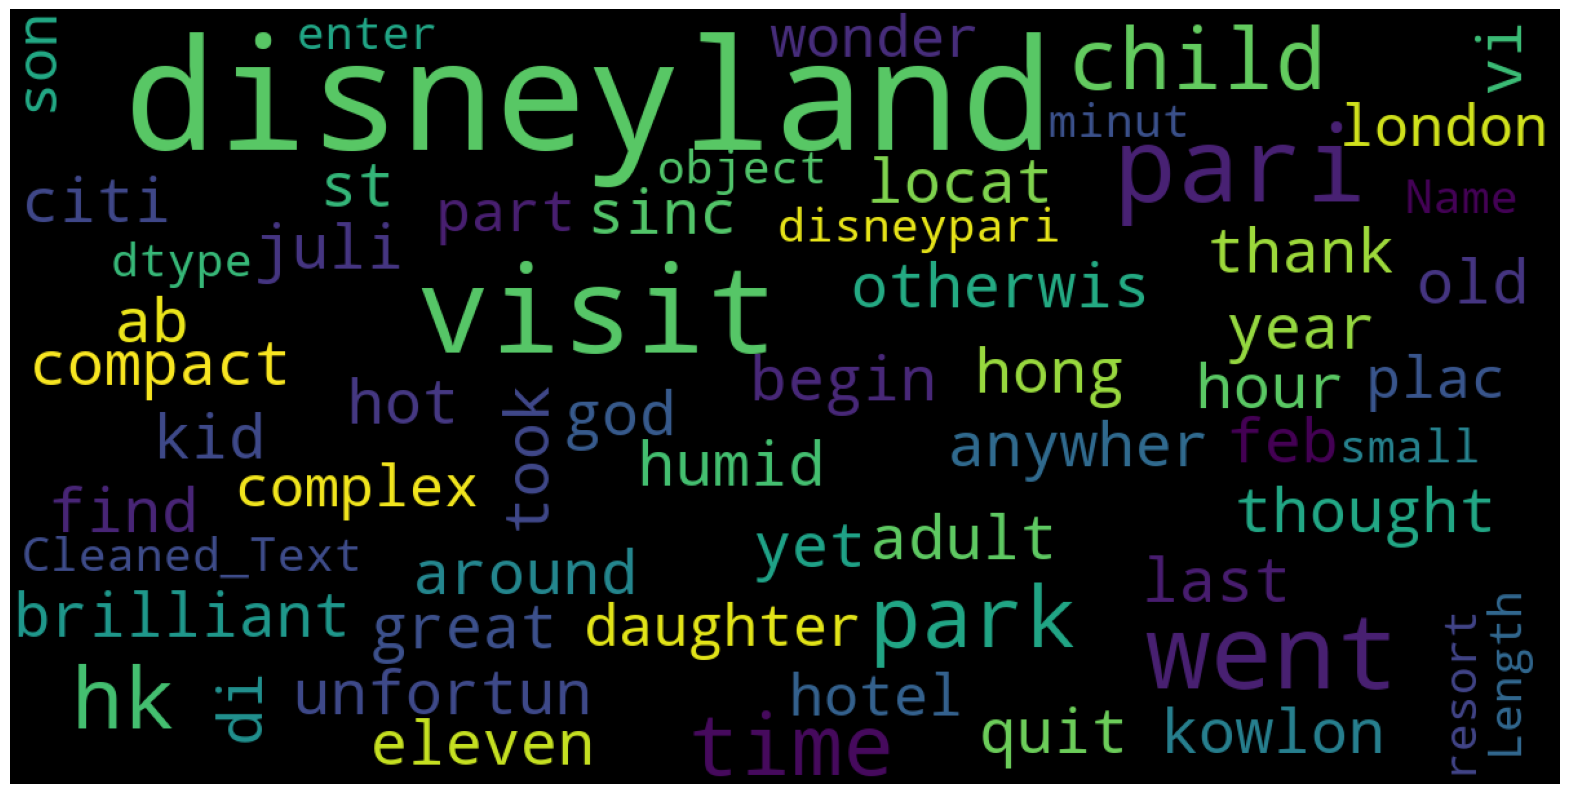

In [35]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(New_Disneyland["Cleaned_Text"])

## 5 - Logistic Regression

In [36]:
New_Disneyland

,Cleaned_Text,Sentiment
0,ever disneyland anywher find disneyland hong k...,1
1,sinc last time visit hk disneyland yet time st...,1
2,thank god hot humid visit park otherwis would ...,1
3,hk disneyland great compact park unfortun quit...,1
4,locat citi took around hour kowlon kid like di...,1
...,...,...
42651,went disneyland pari juli thought brilliant vi...,1
42652,adult child visit disneyland pari begin feb ab...,1
42653,eleven year old daughter went visit son london...,1
42654,hotel part disneyland pari complex wonder plac...,1


In [37]:
Tf = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer ='char')
Tf

TfidfVectorizer(analyzer='char', max_features=20000, ngram_range=(1, 3))

In [38]:
X = Tf.fit_transform(Disneyland["Cleaned_Text"])
Y = Disneyland["Sentiment"]

In [39]:
X.shape

(42656, 10438)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123) 

In [41]:
lr = LogisticRegression(max_iter=5000)

# Define the preprocessing steps for numeric features
lr.fit(X_train, y_train)

# Evaluate the model on the testing data
lr_preds = lr.predict(X_test)

# Evaluate the accuracy of the model
lr_accuracy = accuracy_score(y_test, lr_preds)*100
print(f"Accuracy of Logistic Regression Model: {lr_accuracy:.2f}%")

Accuracy of Logistic Regression Model: 86.86%


## 6 - Word2Vec Model

In [42]:
import gensim
from gensim.models import Word2Vec

In [43]:
X = []
for sent in Disneyland["Cleaned_Text"]:
    tokens = sent.split()
    X.append(tokens)
X[0]

['ever',
 'disneyland',
 'anywher',
 'find',
 'disneyland',
 'hong',
 'kong',
 'similar',
 'layout',
 'walk',
 'main',
 'street',
 'familiar',
 'feel',
 'one',
 'ride',
 'small',
 'world',
 'absolut',
 'fabul',
 'worth',
 'do',
 'day',
 'visit',
 'fairli',
 'hot',
 'rel',
 'busi',
 'queue',
 'move',
 'fairli',
 'well']

In [44]:
w2v_model = Word2Vec(sentences=X,vector_size=100,window=4,min_count=1)

In [45]:
w2v_model.wv["ever"].shape

(100,)

In [46]:
len(w2v_model.wv.key_to_index)

55519

In [47]:
w2v_model.wv.most_similar('love')

[('enjoy', 0.726203203201294),
 ('awesom', 0.6837374567985535),
 ('ador', 0.6825218796730042),
 ('amaz', 0.6650485396385193),
 ('brilliant', 0.653566300868988),
 ('fantast', 0.6429516673088074),
 ('wonder', 0.6323357820510864),
 ('blast', 0.6259382367134094),
 ('great', 0.6086235642433167),
 ('fabul', 0.5997980833053589)]

In [48]:
w2v_model.wv.most_similar('hate')

[('dislik', 0.670623242855072),
 ('itqueu', 0.623012900352478),
 ('guess', 0.6123314499855042),
 ('suck', 0.5986636877059937),
 ('hey', 0.5870411992073059),
 ('dumbi', 0.584335207939148),
 ('everyman', 0.5791953802108765),
 ('die', 0.5722795128822327),
 ('eitherapprox', 0.563754677772522),
 ('anymor', 0.562285840511322)]

In [49]:
w2v_model.wv.most_similar(positive=['love','feel'])

[('enjoy', 0.6383890509605408),
 ('felt', 0.6107888221740723),
 ('wonder', 0.6065195202827454),
 ('appreci', 0.5984957814216614),
 ('excit', 0.5526414513587952),
 ('impress', 0.5500903129577637),
 ('amaz', 0.5494678616523743),
 ('wow', 0.534811794757843),
 ('fun', 0.5332552194595337),
 ('dumbi', 0.5251386761665344)]

In [50]:
w2v_model.wv.most_similar(positive=['hate','feel'])

[('felt', 0.6947343945503235),
 ('suck', 0.6199197769165039),
 ('dumbi', 0.619644045829773),
 ('think', 0.5900552272796631),
 ('guess', 0.5738325119018555),
 ('spoil', 0.5698956847190857),
 ('believ', 0.568667471408844),
 ('appreci', 0.5660971403121948),
 ('kinda', 0.5598008036613464),
 ('kind', 0.5542818307876587)]

## 7 - Prepare embedding with GLOVE

In [134]:
X = Disneyland["Cleaned_Text"]
Y = Disneyland["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [135]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [136]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_size = len(word_tokenizer.word_index) + 1

vocab_size

43003

In [204]:

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [205]:
from numpy import asarray
from numpy import zeros

embeddings_dict = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dict [word] = vector_dimensions
glove_file.close()

In [206]:
#Create an embedding matrix with a number of columns as to the length written before ( 100 ).
#Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_size, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [140]:
embedding_matrix.shape

(43003, 100)

## 8 - RNN ( LSTM )

In [118]:
from keras.layers import LSTM

In [141]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [147]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(lstm_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          4300300   
                                                                 
 lstm_4 (LSTM)               (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4417677 (16.85 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 4300300 (16.40 MB)
_________________________________________________________________
None


In [143]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.33)

Epoch 1/10
150/150 [==============================] - 82s 519ms/step - loss: 0.5001 - acc: 0.7901 - val_loss: 0.4370 - val_acc: 0.8161
Epoch 2/10
150/150 [==============================] - 70s 467ms/step - loss: 0.4438 - acc: 0.8016 - val_loss: 0.4192 - val_acc: 0.8142
Epoch 3/10
150/150 [==============================] - 73s 485ms/step - loss: 0.4108 - acc: 0.8168 - val_loss: 0.4163 - val_acc: 0.8267
Epoch 4/10
150/150 [==============================] - 73s 488ms/step - loss: 0.3904 - acc: 0.8304 - val_loss: 0.3661 - val_acc: 0.8484
Epoch 5/10
150/150 [==============================] - 73s 485ms/step - loss: 0.3734 - acc: 0.8401 - val_loss: 0.3675 - val_acc: 0.8490
Epoch 6/10
150/150 [==============================] - 74s 496ms/step - loss: 0.3660 - acc: 0.8488 - val_loss: 0.3658 - val_acc: 0.8525
Epoch 7/10
150/150 [==============================] - 74s 496ms/step - loss: 0.3446 - acc: 0.8600 - val_loss: 0.3477 - val_acc: 0.8615
Epoch 8/10
150/150 [==============================] - 7

In [144]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

440/440 [==============================] - 31s 71ms/step - loss: 0.3506 - acc: 0.8520


In [145]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.350551038980484
Test Accuracy: 0.8519570827484131


In [146]:
lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.tf", save_format='tf')

INFO:tensorflow:Assets written to: ./c1_lstm_model_acc_0.852.tf\assets


INFO:tensorflow:Assets written to: ./c1_lstm_model_acc_0.852.tf\assets


## 9 - Prediction

In [148]:
from keras.models import load_model

In [149]:
model_path ='c1_lstm_model_acc_0.842.tf'
pretrained_lstm_model = load_model(model_path)

In [207]:
sample = pd.read_csv("DisneylandReviews.csv")
sample = sample[0:7]

In [208]:
sample["Sentiment"] = sample["Rating"].apply(lambda rating : 1 if rating >= 4 else 0)
sample

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong,0
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong,1


In [209]:
sample_reviews_text = sample["Review_Text"]
sample_processed_reviews = []
for sentence in sample_reviews_text:
    sentence = denoise_text(sentence)
    sentence = clean_text(sentence)
    sentence = stemmer(sentence)
    sample_processed_reviews.append(sentence)

In [210]:
sentence_tokenized = word_tokenizer.texts_to_sequences(sample_processed_reviews)
sentence_padded = pad_sequences(sentence_tokenized, padding="post", maxlen=100)

In [211]:
sentiment_predicted = lstm_model.predict(sentence_padded)
sentiment_predicted

1/1 [==============================] - 0s 84ms/step


array([[0.87514496],
       [0.7364046 ],
       [0.9422644 ],
       [0.89834106],
       [0.7170527 ],
       [0.22261216],
       [0.97785366]], dtype=float32)

In [213]:
sample["Prediction_value"] = sentiment_predicted
sample["Sentiment_predicted"] = sample["Prediction_value"].apply(lambda value : 1 if value >=0.5 else 0)
sample

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Prediction_value,Sentiment_predicted
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,0.875145,1
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,0.736405,1
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,0.942264,1
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,0.898341,1
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,0.717053,1
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong,0,0.222612,0
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong,1,0.977854,1
